## Kospi 200 close price prediction using OHLC

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout,GRU

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


### data load

In [2]:
data=pd.read_csv('data/kospi.csv')
data.head()

,date,open,high,low,close
0,2019-12-30,2202.62,2206.36,2188.10,2203.60
1,2019-12-27,2183.70,2215.55,2177.40,2204.21
2,2019-12-26,2192.22,2198.01,2183.90,2197.93
3,2019-12-24,2206.23,2206.23,2187.58,2190.08
4,2019-12-23,2208.22,2209.20,2196.43,2203.71


### reshape [-1,1] & scale adjust

In [3]:
price_data=data[['open', 'high', 'low', 'close']]

price_data_open=price_data['open'].as_matrix().reshape(-1, 1)
price_data_high=price_data['high'].as_matrix().reshape(-1, 1)
price_data_low=price_data['low'].as_matrix().reshape(-1, 1)
price_data_close=price_data['close'].as_matrix().reshape(-1, 1)

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
sc_open = MinMaxScaler()
sc_high = MinMaxScaler()
sc_low = MinMaxScaler()
sc_close = MinMaxScaler()

price_data['open'] = sc_open.fit_transform(price_data_open)
price_data['high'] = sc_high.fit_transform(price_data_high)
price_data['low'] = sc_low.fit_transform(price_data_low)
price_data['close'] = sc_close.fit_transform(price_data_close)

price_data=pd.DataFrame(price_data)
price_data.columns=['open','high','low','close']

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [5]:
price_data.head()

,open,high,low,close
0,0.831907,0.826976,0.827091,0.829785
1,0.823706,0.830944,0.822460,0.830048
2,0.827399,0.823370,0.825273,0.827339
3,0.833472,0.826920,0.826866,0.823953
4,0.834335,0.828202,0.830697,0.829833


#### y value include

this model will predict 5 days later with 5 days price imformation

- -> example 1,2,3,4,5 day kospi information -> predict 10 day kospi close

In [6]:
data_close = price_data[["close"]]
data_close = data_close[10:].reset_index()[["close"]]
data_close = data_close.rename(columns = {"close" : "y"})

In [7]:
result = pd.concat([price_data,data_close], axis=1)
result = result[:-10]
result.head()

,open,high,low,close,y
0,0.831907,0.826976,0.827091,0.829785,0.815399
1,0.823706,0.830944,0.822460,0.830048,0.801207
2,0.827399,0.823370,0.825273,0.827339,0.787520
3,0.833472,0.826920,0.826866,0.823953,0.784233
4,0.834335,0.828202,0.830697,0.829833,0.780199


In [8]:
y=result['y']

### to make group using 5 days kospi

In [9]:
len(result)

7933

In [10]:
d_matrix=price_data.as_matrix()

p_result =[]
for i in range(len(price_data)-10):
    for j in range(5):
        p_result.append(d_matrix[i+j])

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
p_result=np.array(p_result)
p_result=p_result.reshape((len(d_matrix)-10,5,4))
p_result

array([[[0.83190724, 0.82697564, 0.8270914 , 0.82978531],
        [0.82370611, 0.83094353, 0.82245972, 0.83004844],
        [0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276]],

       [[0.82370611, 0.83094353, 0.82245972, 0.83004844],
        [0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276],
        [0.83318596, 0.82717425, 0.8299916 , 0.8300355 ]],

       [[0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276],
        [0.83318596, 0.82717425, 0.8299916 , 0.8300355 ],
        [0.83052016, 0.82627186, 0.82643777, 0.82674845]],

       ...,

       [[0.27292154, 0.26856901, 0.27196149, 0.26991748],
        [0.27451669, 0.2710171 , 0.27564952, 0.273420

In [12]:
p_result[0]

array([[0.83190724, 0.82697564, 0.8270914 , 0.82978531],
       [0.82370611, 0.83094353, 0.82245972, 0.83004844],
       [0.82739922, 0.82337042, 0.82527336, 0.82733943],
       [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
       [0.83433463, 0.82820184, 0.83069718, 0.82983276]])

### make train, test set

In [13]:
X_train,X_test = p_result[:int(len(p_result)*0.9)],p_result[int(len(p_result)*0.9):]
y_train,y_test = y[:int(len(p_result)*0.9)],y[int(len(p_result)*0.9):]

In [14]:
X_train

array([[[0.83190724, 0.82697564, 0.8270914 , 0.82978531],
        [0.82370611, 0.83094353, 0.82245972, 0.83004844],
        [0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276]],

       [[0.82370611, 0.83094353, 0.82245972, 0.83004844],
        [0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276],
        [0.83318596, 0.82717425, 0.8299916 , 0.8300355 ]],

       [[0.82739922, 0.82337042, 0.82527336, 0.82733943],
        [0.83347204, 0.82691951, 0.8268663 , 0.82395317],
        [0.83433463, 0.82820184, 0.83069718, 0.82983276],
        [0.83318596, 0.82717425, 0.8299916 , 0.8300355 ],
        [0.83052016, 0.82627186, 0.82643777, 0.82674845]],

       ...,

       [[0.13500217, 0.13190334, 0.13424928, 0.13265522],
        [0.13725184, 0.13395852, 0.13712784, 0.135717

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7139, 5, 4), (7139,), (794, 5, 4), (794,))

### model

In [16]:
model_GRU = Sequential()
model_GRU.add(GRU(units=100, input_shape=(X_train.shape[1],4), activation='tanh'))


# can make more layers

#regressorGRU.add(GRU(units=10 , input_shape=(x_train.shape[1],4), activation='tanh'))
#regressorGRU.add(Dropout(0.1))

#regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],4), activation='tanh'))
#regressorGRU.add(Dropout(0.2))

#regressorGRU.add(GRU(units=50, activation='tanh'))
#regressorGRU.add(Dropout(0.2))

model_GRU.add(Dense(units=1))
model_GRU.add(Dropout(0.1))

In [17]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               31500     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_GRU.compile(optimizer='rmsprop', loss='mean_squared_error')

In [19]:
model_GRU.fit(X_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
7139/7139 [==============================] - 3s 466us/step - loss: 0.0291
Epoch 2/50
7139/7139 [==============================] - 3s 352us/step - loss: 0.0297
Epoch 3/50
7139/7139 [==============================] - 2s 347us/step - loss: 0.0262
Epoch 4/50
7139/7139 [==============================] - 3s 406us/step - loss: 0.0250
Epoch 5/50
7139/7139 [==============================] - 2s 338us/step - loss: 0.0252
Epoch 6/50
7139/7139 [==============================] - 2s 345us/step - loss: 0.0270
Epoch 7/50
7139/7139 [==============================] - 2s 337us/step - loss: 0.0285
Epoch 8/50
7139/7139 [==============================] - 2s 342us/step - loss: 0.0273
Epoch 9/50
7139/7139 [==============================] - 2s 344us/step - loss: 0.0268
Epoch 10/50
7139/7139 [==============================] - 2s 346us/step - loss: 0.0278
Epoch 11/50
7139/7139 [==============================] - 2s 348us/step - loss: 0.0276
Epoch 12/50
7139/7139 [==============================] - 3s 361

In [20]:
predicted = model_GRU.predict(X_test)

In [21]:
predicted

array([[0.13518497],
       [0.13507341],
       [0.13143459],
       [0.1343636 ],
       [0.12975422],
       [0.1274479 ],
       [0.12525783],
       [0.12416258],
       [0.12506399],
       [0.12443686],
       [0.12395467],
       [0.12394318],
       [0.12609781],
       [0.12290493],
       [0.1207068 ],
       [0.12105305],
       [0.11909816],
       [0.11886516],
       [0.11976367],
       [0.11850218],
       [0.12023595],
       [0.12474878],
       [0.12458533],
       [0.12661964],
       [0.12431353],
       [0.1285807 ],
       [0.12913947],
       [0.12885426],
       [0.13053106],
       [0.13467024],
       [0.1365953 ],
       [0.13140348],
       [0.13318335],
       [0.13525625],
       [0.13380425],
       [0.1338251 ],
       [0.13593793],
       [0.13570417],
       [0.1324761 ],
       [0.13195063],
       [0.13372421],
       [0.13590632],
       [0.13530599],
       [0.13965724],
       [0.13862042],
       [0.13883798],
       [0.13627234],
       [0.138

In [22]:
RMSE = mean_squared_error(y_test, predicted)**0.5    
print("RMSE =" ,RMSE)
error = y_test.values - predicted.reshape(1,-1)
print("std ={}" .format(np.std(error)))

RMSE = 0.019429207238005057
std =0.011442735945913884


In [23]:
y_test=np.array(y_test)
y_test

array([0.13626148, 0.13064934, 0.13123169, 0.13308228, 0.132776  ,
       0.13277169, 0.13274149, 0.13257326, 0.12859602, 0.12749171,
       0.12863053, 0.12773327, 0.12494662, 0.1276772 , 0.12637877,
       0.12901876, 0.13373365, 0.13365169, 0.13648148, 0.13185287,
       0.13760736, 0.14076499, 0.13704226, 0.13918618, 0.14553596,
       0.14308577, 0.14141636, 0.14844771, 0.14549713, 0.14467753,
       0.14349989, 0.14423322, 0.14459125, 0.14164499, 0.14211518,
       0.14432812, 0.14628223, 0.14625203, 0.15012574, 0.148603  ,
       0.1492932 , 0.14633399, 0.1511826 , 0.14490184, 0.14694654,
       0.14343087, 0.14450498, 0.14854693, 0.14727438, 0.1518728 ,
       0.15431436, 0.15570769, 0.15223515, 0.15212731, 0.15880062,
       0.15452573, 0.15535396, 0.15861944, 0.16333001, 0.16240688,
       0.16574569, 0.17009822, 0.17564565, 0.17750055, 0.17725035,
       0.17722447, 0.1774531 , 0.17276841, 0.16570255, 0.1636104 ,
       0.16649196, 0.17043901, 0.16577157, 0.1630755 , 0.16714

In [24]:
predicted

array([[0.13518497],
       [0.13507341],
       [0.13143459],
       [0.1343636 ],
       [0.12975422],
       [0.1274479 ],
       [0.12525783],
       [0.12416258],
       [0.12506399],
       [0.12443686],
       [0.12395467],
       [0.12394318],
       [0.12609781],
       [0.12290493],
       [0.1207068 ],
       [0.12105305],
       [0.11909816],
       [0.11886516],
       [0.11976367],
       [0.11850218],
       [0.12023595],
       [0.12474878],
       [0.12458533],
       [0.12661964],
       [0.12431353],
       [0.1285807 ],
       [0.12913947],
       [0.12885426],
       [0.13053106],
       [0.13467024],
       [0.1365953 ],
       [0.13140348],
       [0.13318335],
       [0.13525625],
       [0.13380425],
       [0.1338251 ],
       [0.13593793],
       [0.13570417],
       [0.1324761 ],
       [0.13195063],
       [0.13372421],
       [0.13590632],
       [0.13530599],
       [0.13965724],
       [0.13862042],
       [0.13883798],
       [0.13627234],
       [0.138

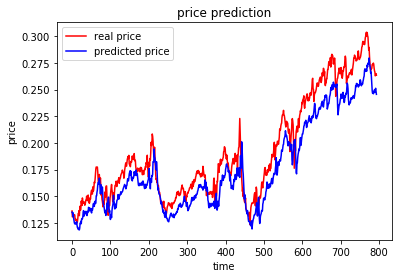

In [25]:
plt.plot(y_test, color="red", label="real price")
plt.plot(predicted, color="blue", label="predicted price")
plt.title("price prediction")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()